In [4]:
import pandas as pd 


In [6]:
train_dt = pd.read_csv('train.csv')
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#시각화 준비
plt.style.use('seaborn-v0_8')
sns.set(font_scale=2)
# 한글 사용 준비
plt.rcParams['font.family']='NanumGothic'

In [11]:
train_dt['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\danil\AppData\Local\Temp\ipykernel_20760\918354081.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xlabel='', xticklabels=labels)


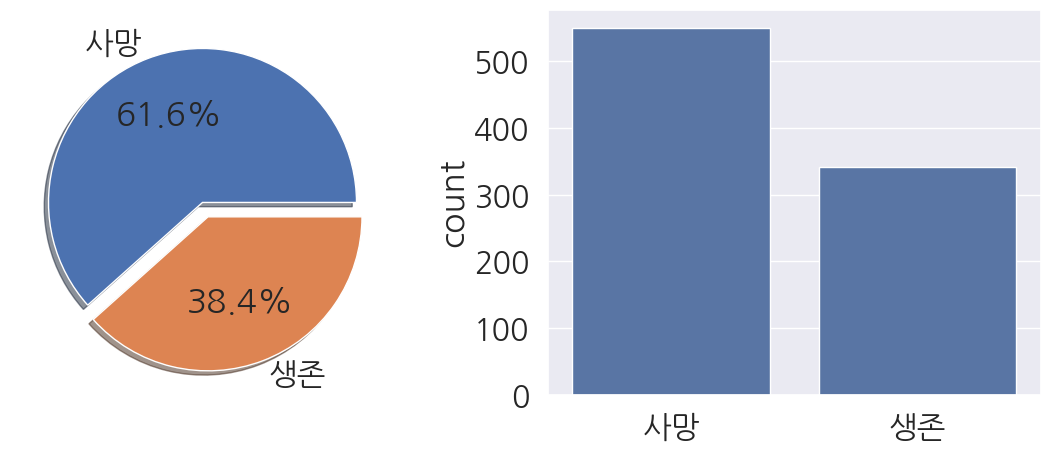

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['사망', '생존']
# Pie Plot
train_dt['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0, 0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')
# Count Plot
sns.countplot(data=train_dt, x='Survived', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()

In [13]:
train_dt['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [26]:
train_dt['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

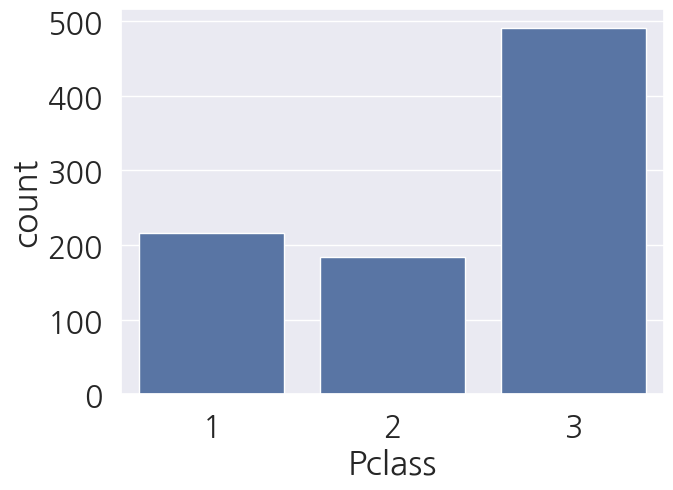

In [28]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=train_dt, x='Pclass', ax=ax)

In [30]:
#Groupby를 이용한 Pclass에 따른 Survived의 평균
train_dt[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


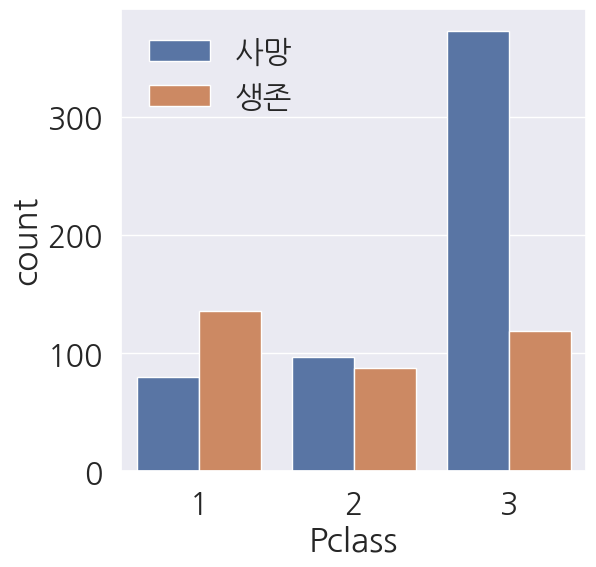

In [32]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train_dt, x='Pclass', hue='Survived', ax=ax)

labels=['사망', '생존']
#범례 한글로 변경
ax.legend(labels=labels)
plt.show()

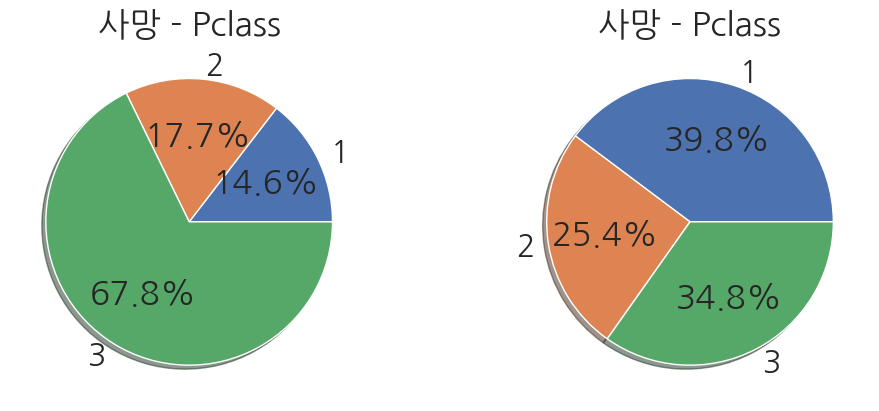

In [34]:
fig, ax = plt.subplots(1,2,figsize=(10,4), constrained_layout=True)

#Survived 가 0인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 0]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[0],shadow=True, autopct='%1.1f%%')
ax[0].set(ylabel='', title='사망 - Pclass')
#Survived 가 1인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 1]['Pclass'].value_counts().sort_index().plot.pie(ax=ax[1],shadow=True, autopct='%1.1f%%')
ax[1].set(ylabel='', title='사망 - Pclass')

plt.show()

C:\Users\danil\AppData\Local\Temp\ipykernel_20760\786610225.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xticklabels=labels, xlabel='')


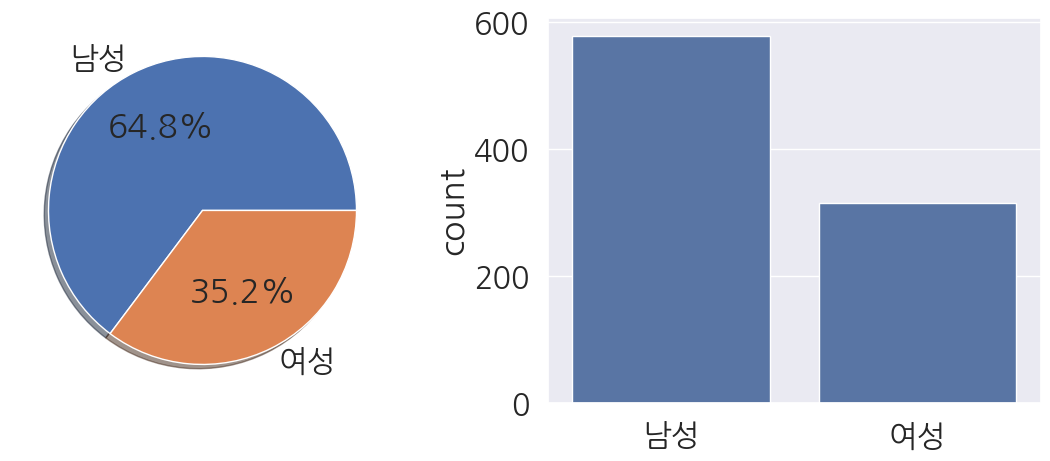

In [86]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
labels = ['남성', '여성']
 
# Pie Plot
train_dt['Sex'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')
 
# Count Plot
sns.countplot(data=train_dt, x='Sex', ax=ax[1])
ax[1].set(xticklabels=labels, xlabel='')
 
plt.show()

In [37]:
#Groupby를 이용한 Sex에 따른 Survived의 평균
train_dt[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\danil\AppData\Local\Temp\ipykernel_20760\1255130628.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['남성', '여성'], xlabel='')


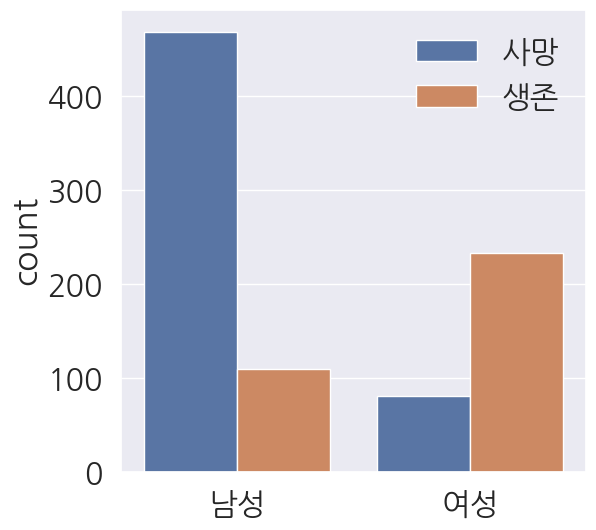

In [38]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train_dt, x='Sex', hue='Survived', ax=ax)

ax.set(xticklabels=['남성', '여성'], xlabel='')

#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)

plt.show()

[Text(0, 0.5, ''), Text(0.5, 1.0, '사망 - Sex')]

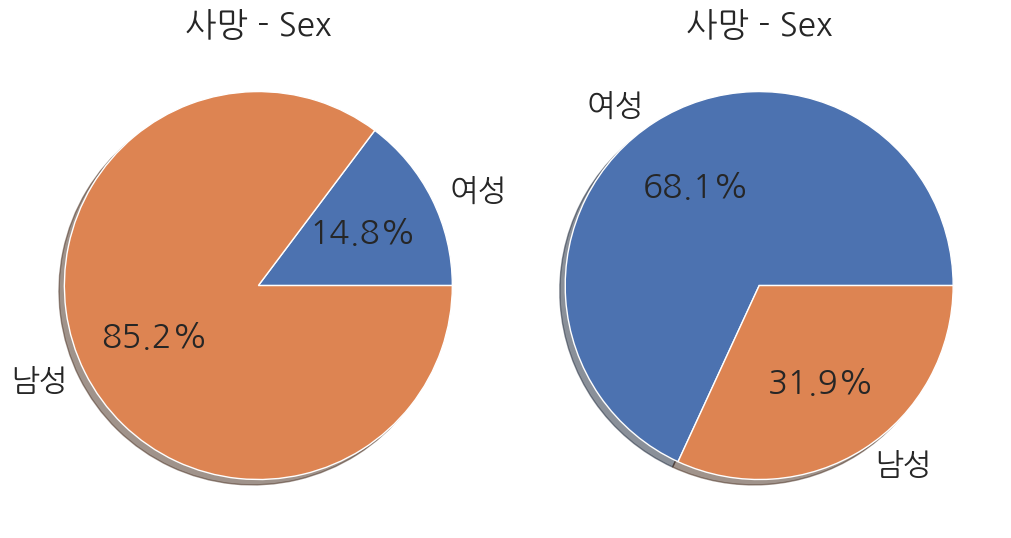

In [41]:
fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels=['여성', '남성']
#Survived 가 0인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 0]['Sex'].value_counts().sort_index().plot.pie(ax=ax[0],shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='사망 - Sex')
#Survived 가 1인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 1]['Sex'].value_counts().sort_index().plot.pie(ax=ax[1],shadow=True, autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='사망 - Sex')

C:\Users\danil\AppData\Local\Temp\ipykernel_20760\2178179314.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dt['Age'],bins=25,ax=ax)


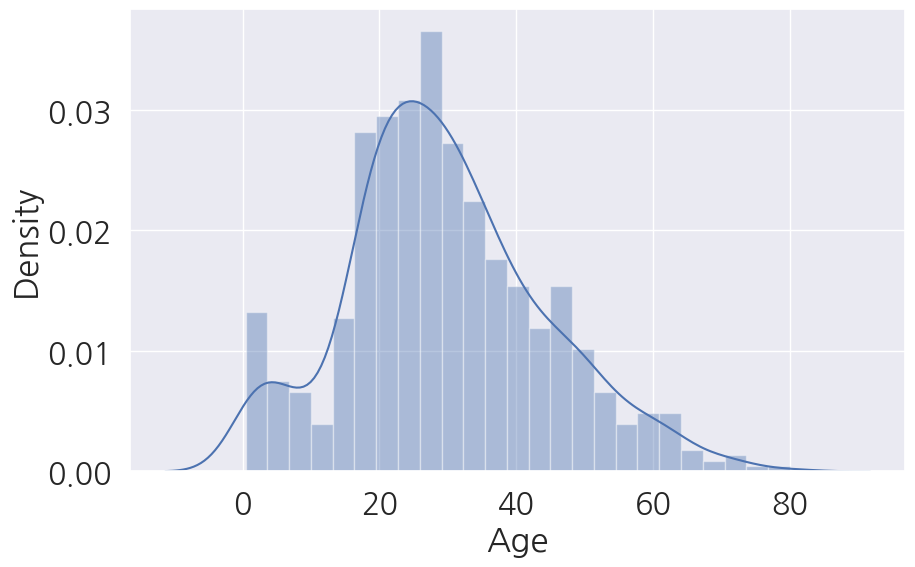

In [43]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(train_dt['Age'],bins=25,ax=ax)

plt.show()

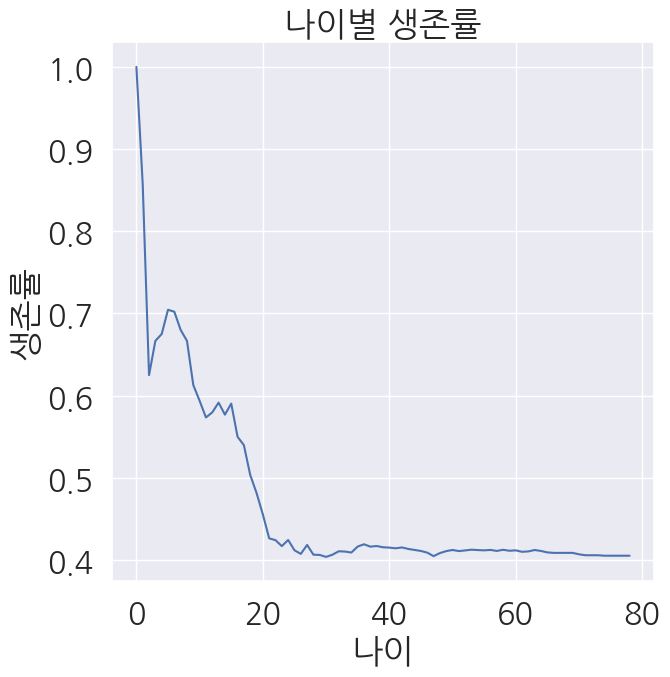

In [44]:
# 생존율을 입력받을 List 생성
age_range_survival_ratio = []
# 1살 부터 생존율 구하기
for i in range(1,80):
    age_range_survival_ratio.append(train_dt[train_dt['Age']<i]['Survived'].sum() / len(train_dt[train_dt['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('나이별 생존률')
plt.ylabel('생존률')
plt.xlabel('나이')

plt.show()

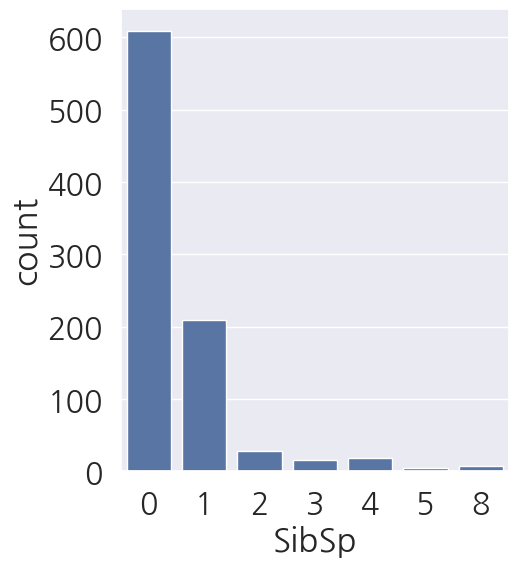

In [45]:
fig, ax= plt.subplots(figsize=(5,6))

sns.countplot(data=train_dt, x='SibSp')
plt.show()

In [47]:
#Groupby를 이용한 SibSp에 따른 Survived의 평균
train_dt[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


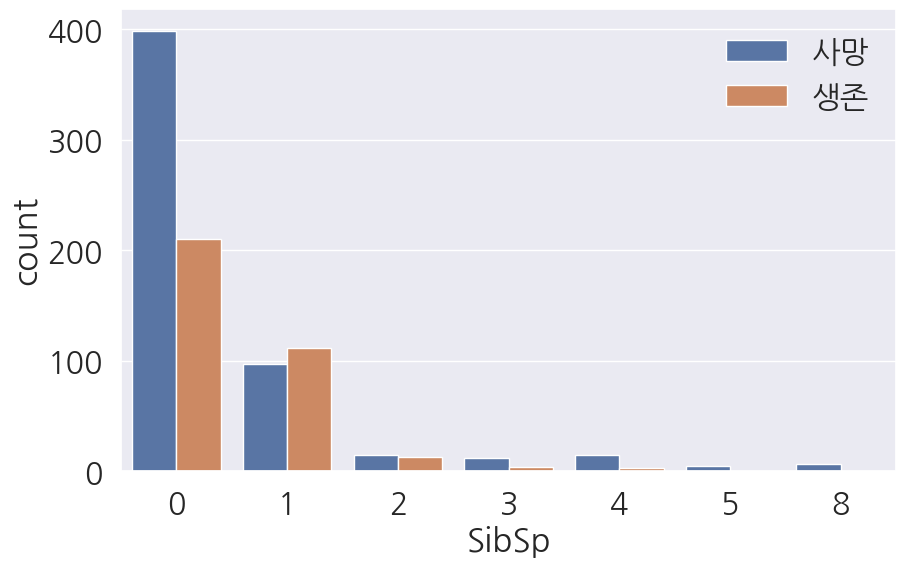

In [48]:
fig, ax = plt.subplots(figsize = (10,6))

sns.countplot(data=train_dt, x='SibSp', hue='Survived', ax=ax)
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
plt.show()

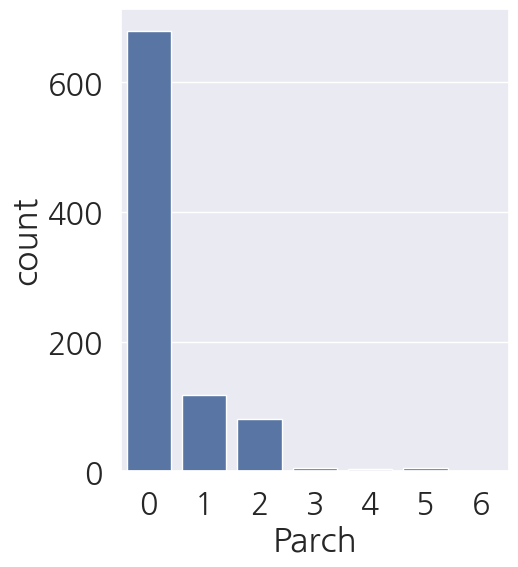

In [50]:
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(data=train_dt, x='Parch')
plt.show()

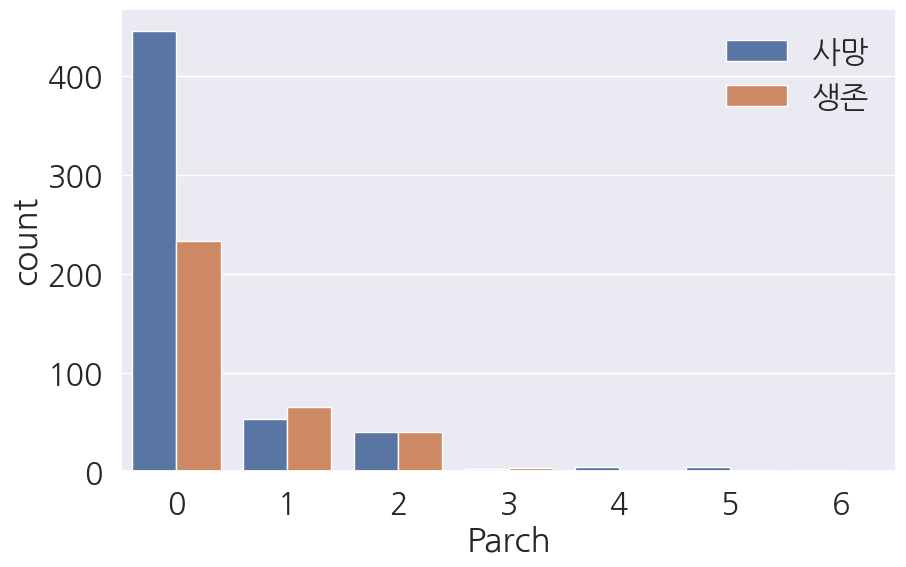

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(data=train_dt, x='Parch', hue='Survived', ax=ax)
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
plt.show()

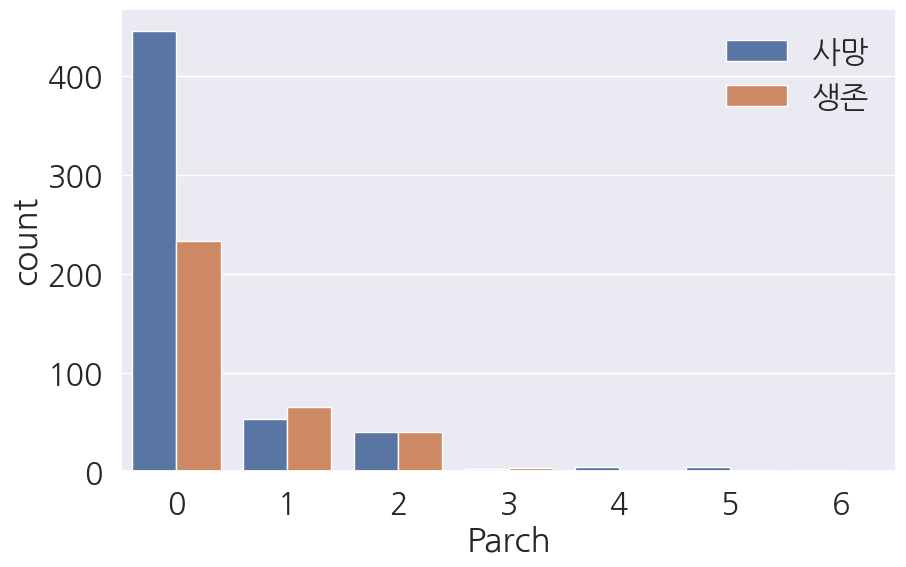

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=train_dt, x='Parch', hue='Survived', ax=ax)
labels=['사망', '생존']
ax.legend(labels=labels)
plt.show()

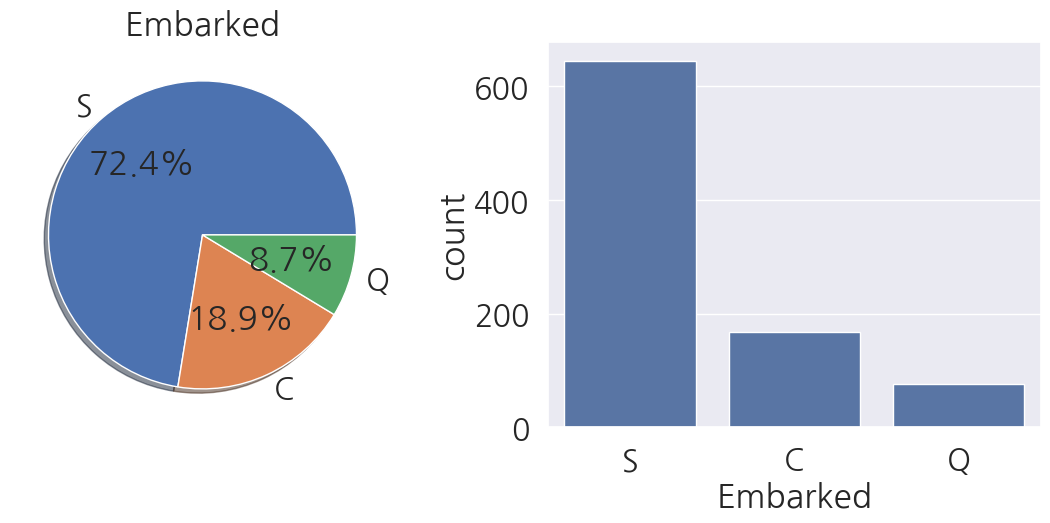

In [56]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

train_dt['Embarked'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(title='Embarked', ylabel='')
sns.countplot(data=train_dt, x='Embarked', ax=ax[1])
plt.show()

In [58]:
#Groupby를 이용한 Embarked에 따른 Survived의 평균
train_dt[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


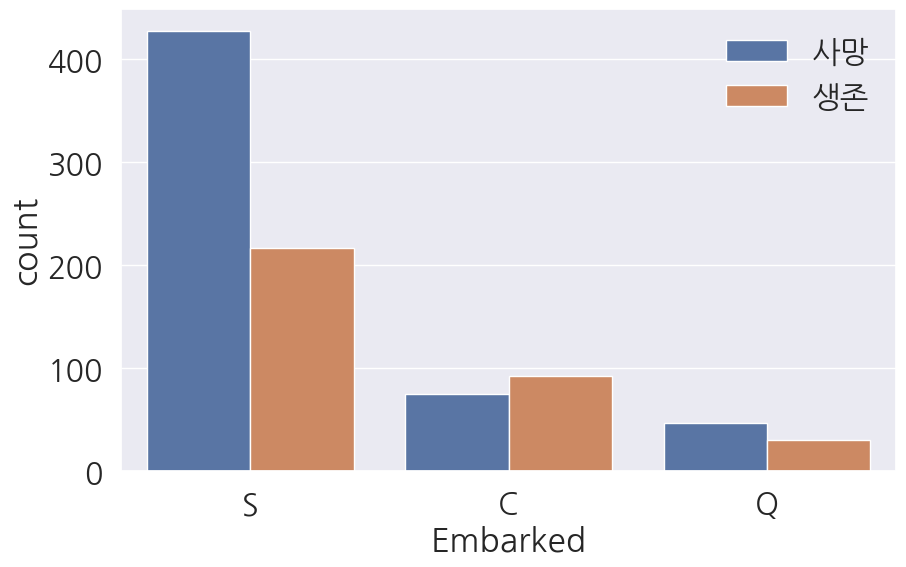

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(data=train_dt, x = 'Embarked', hue = 'Survived', ax=ax)
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)

plt.show()

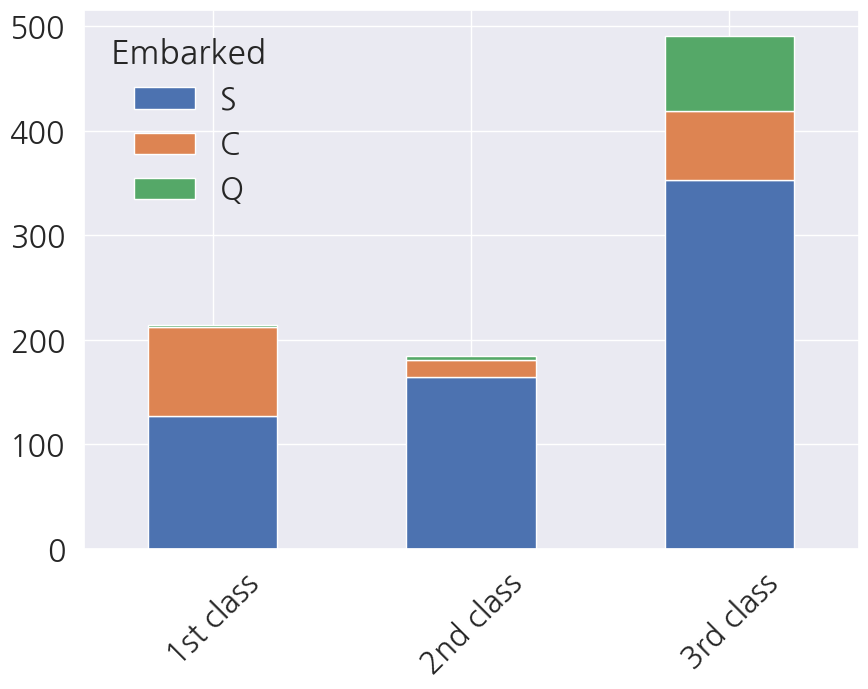

In [61]:
# Pclass 별로 데이터를 나눠줍니다
Pclass1 = train_dt[train_dt['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_dt[train_dt['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_dt[train_dt['Pclass']==3]['Embarked'].value_counts()
# DataFrame으로 만들어서 그래프
fig, ax = plt.subplots(figsize=(10,7))
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, ax=ax)
# xlabel 회전
plt.xticks(rotation=45)
plt.show()

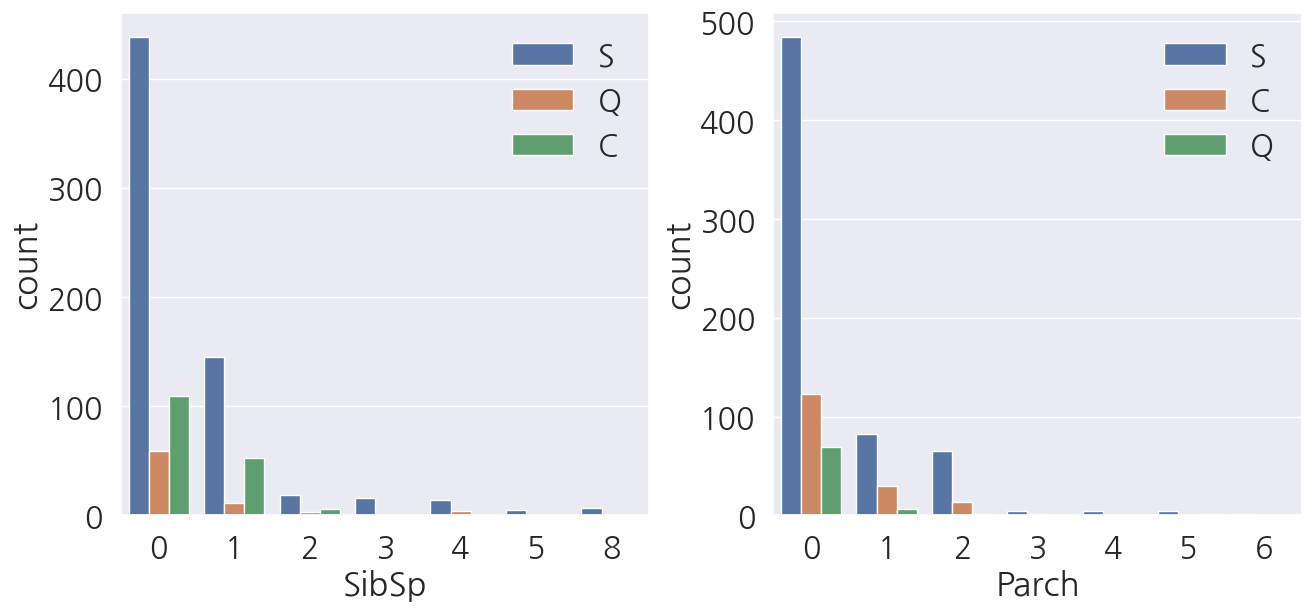

In [63]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)
sns.countplot(data=train_dt, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train_dt, x='Parch', hue='Embarked', ax=ax[1])
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()

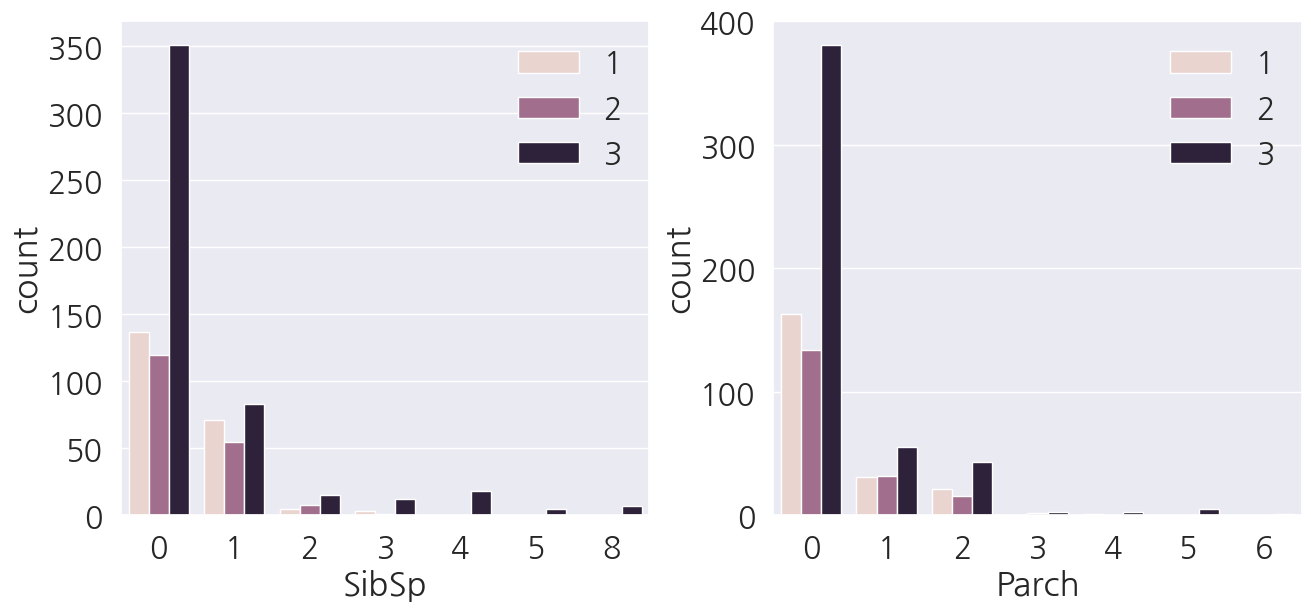

In [65]:
fig, ax = plt.subplots(1,2,figsize=(13,6), constrained_layout=True)
sns.countplot(data=train_dt, x='SibSp', hue='Pclass', ax=ax[0])
sns.countplot(data=train_dt, x='Parch', hue='Pclass', ax=ax[1])
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.show()

C:\Users\danil\AppData\Local\Temp\ipykernel_20760\1266407216.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dt['Fare'], bins=25, ax=ax)


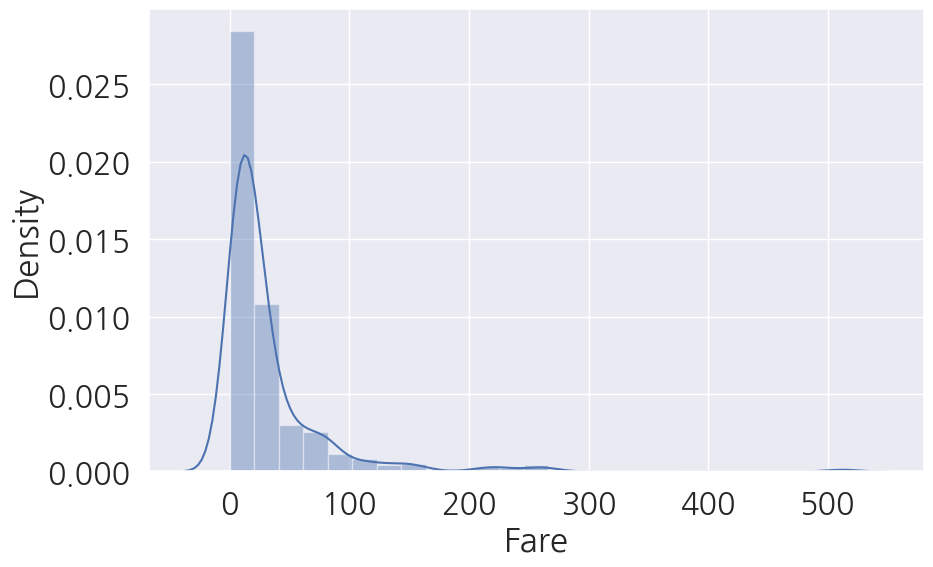

In [66]:
fig, ax = plt.subplots(figsize=(10,6))
# 분포확인
sns.distplot(train_dt['Fare'], bins=25, ax=ax)
plt.show()

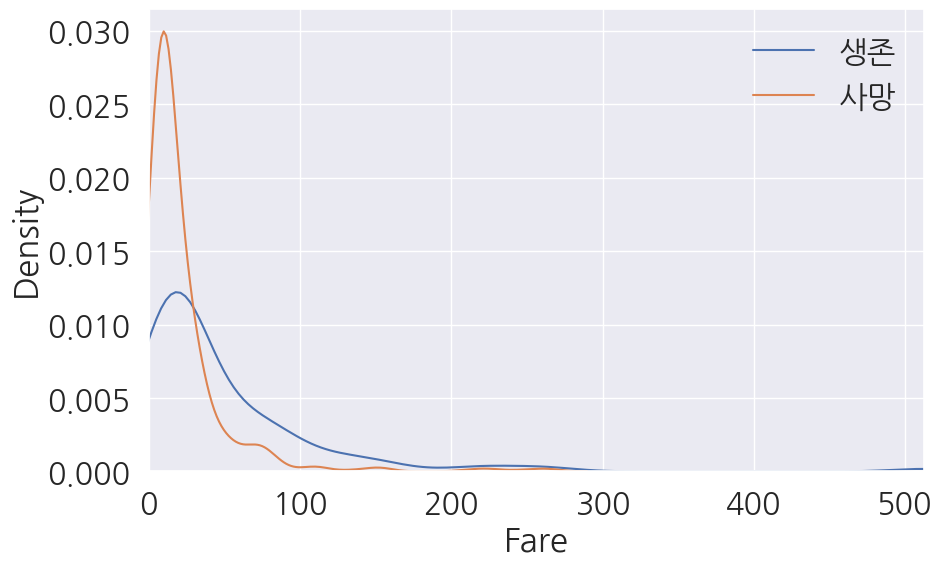

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
# 분포 확인
sns.kdeplot(train_dt[train_dt['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_dt[train_dt['Survived']==0]['Fare'], ax=ax)
# 가장 높은 가격까지 범위 확대
ax.set(xlim=(0,train_dt['Fare'].max()))
ax.legend(['생존', '사망'])
plt.show()

In [70]:
train_dt['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [72]:
train_dt['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',